In [1]:
# import tarfile

# # Extract entire wikiart dataset
# with tarfile.open("wikiart.tar") as tar:
#     tar.extractall('./')

In [2]:
import os

# Create all folders needed for analysis
models = os.listdir('models')
print(models)

for model in models:
    os.makedirs('models/' + model + '/images/', exist_ok=True)
    os.makedirs('models/' + model + '/state/', exist_ok=True)

os.makedirs('data_visualizations', exist_ok=True)
os.makedirs('results', exist_ok=True)

['predefined', 'hugging-face']


In [3]:
# List directories
import pandas as pd

sample_percentage = 0.95

wikiart_metadata_df = pd.read_csv('./wikiart/wclasses.csv')
wikiart_metadata_df[['style_name', 'file']] = wikiart_metadata_df['file'].str.split('/', expand=True)
print('Initial number of images', len(wikiart_metadata_df))
wikiart_metadata_df = wikiart_metadata_df.drop_duplicates(subset=['file'])
print('Remaining images', len(wikiart_metadata_df))

num_styles = wikiart_metadata_df['style_name'].nunique()
print('Number of styles', num_styles)
num_genres = wikiart_metadata_df['genre'].nunique()
print('Number of genres', num_genres)
num_artists = wikiart_metadata_df['artist'].nunique()
print('Number of artists', num_artists)

wikiart_sample_df = wikiart_metadata_df.sample(frac=sample_percentage, replace=False)
wikiart_sample_df.to_csv('./data/wikiart_sample.csv', index=False)
num_sampled_styles = wikiart_sample_df['style_name'].nunique()
print('Number of sampled styles', num_sampled_styles)

print(wikiart_sample_df.head())

with open('./data/num_styles.txt', 'w') as f:
    f.write('%d' % num_styles)

Initial number of images 81444
Remaining images 80095
Number of styles 27
Number of genres 11
Number of artists 129
Number of sampled styles 27
                                                    file  artist  genre  \
12810       nicholas-roerich_mountain-landscape-1933.jpg      14    137   
59448                  a.y.-jackson_nellie-lake-1933.jpg       0    133   
2803                        childe-hassam_summertime.jpg       3    133   
63581  john-everett-millais_the-honourable-john-nevil...       0    135   
33483  vasily-surikov_yermak-with-cossacks-study-to-t...      92    137   

       style          style_name  
12810    164           Symbolism  
59448    143  Art_Nouveau_Modern  
2803     152       Impressionism  
63581    161             Realism  
33483    161             Realism  


In [4]:
# Calculate weights
total = len(wikiart_metadata_df)
print(total)
print(wikiart_metadata_df['style_name'].value_counts())
weights = (1 - wikiart_metadata_df['style_name'].value_counts() / total)
weights.index.name='Style'
weights.to_csv('./data/style_weights.csv')

80095
Impressionism                 12884
Realism                       10688
Romanticism                    7004
Expressionism                  6459
Post_Impressionism             6406
Symbolism                      4441
Art_Nouveau_Modern             4217
Baroque                        4210
Abstract_Expressionism         2582
Northern_Renaissance           2552
Naive_Art_Primitivism          2308
Cubism                         2218
Rococo                         2074
Color_Field_Painting           1572
Pop_Art                        1465
Early_Renaissance              1391
High_Renaissance               1343
Minimalism                     1334
Mannerism_Late_Renaissance     1279
Ukiyo_e                        1167
Fauvism                         775
Pointillism                     508
Contemporary_Realism            481
New_Realism                     314
Synthetic_Cubism                216
Analytical_Cubism               110
Action_painting                  97
Name: style_name, dtyp

Text(0, 0.5, 'Style')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Linux Libertine
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Linux Libertine
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Linux Libertine


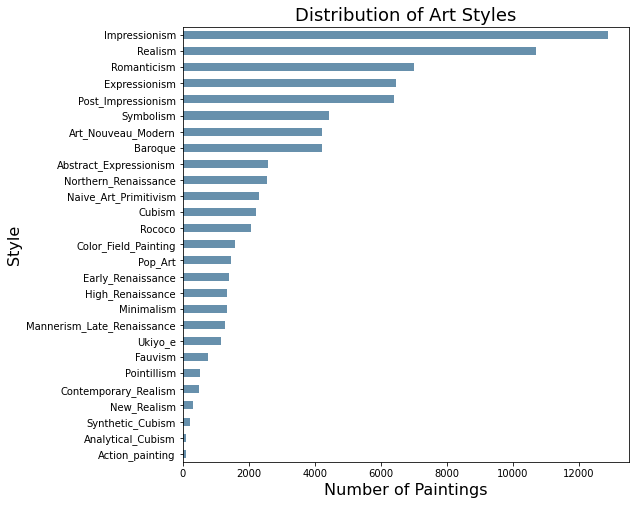

In [5]:
# Look at the balance of data for the entire dataset
from turtle import color
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Linux Libertine"]
plt.rcParams["figure.dpi"] = 300

axes = wikiart_metadata_df['style_name'].value_counts().sort_values().plot(kind='barh', color='#6790ac', figsize=(8,8))
axes.set_title("Distribution of Art Styles", fontsize=18)
axes.set_xlabel("Number of Paintings", fontsize=16)
axes.set_ylabel("Style", fontsize=16)

plt.savefig('data_visualizations/wikiart_image_metadata.jpg', dpi=300, bbox_inches='tight')  
plt.savefig('data_visualizations/wikiart_image_metadata.pdf', dpi=300, bbox_inches='tight')  

Text(0, 0.5, 'Artist Id')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Linux Libertine
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Linux Libertine


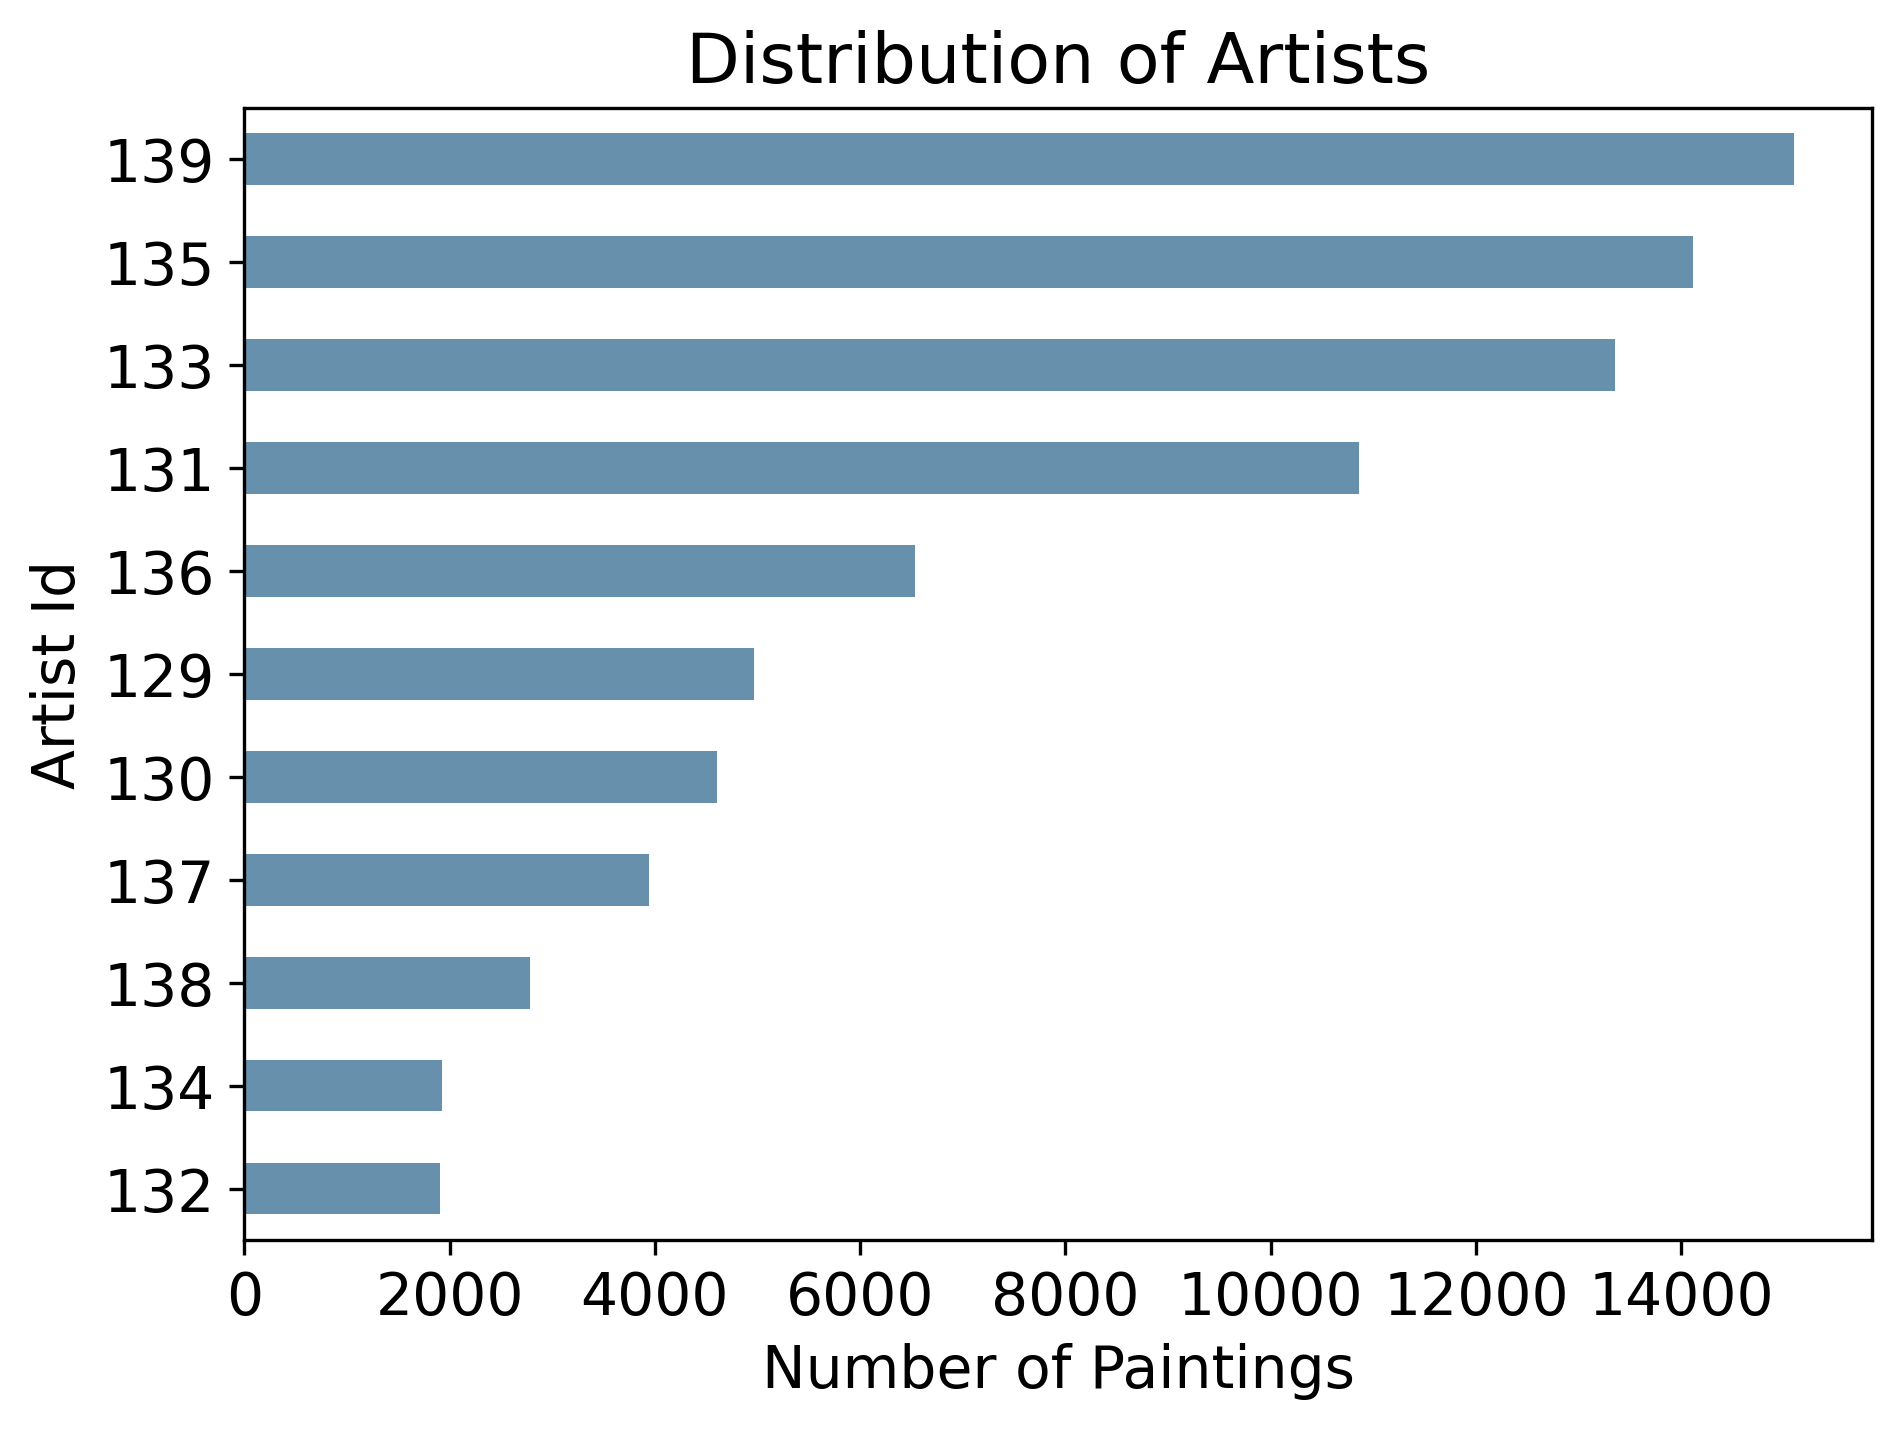

In [6]:
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Linux Libertine"]
plt.rcParams["figure.dpi"] = 300

axes = wikiart_metadata_df['genre'].value_counts().sort_values().plot(kind = 'barh', color = '#6790ac', figsize=(7, 5))
axes.set_title("Distribution of Artists")
axes.set_xlabel("Number of Paintings")
axes.set_ylabel("Artist Id")
plt.savefig('data_visualizations/wikiart_style_metadata.jpg', dpi=300, bbox_inches='tight')  
plt.savefig('data_visualizations/wikiart_style_metadata.pdf', dpi=300, bbox_inches='tight')  

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import random

train_df, test_df = train_test_split(wikiart_sample_df, test_size=0.1)

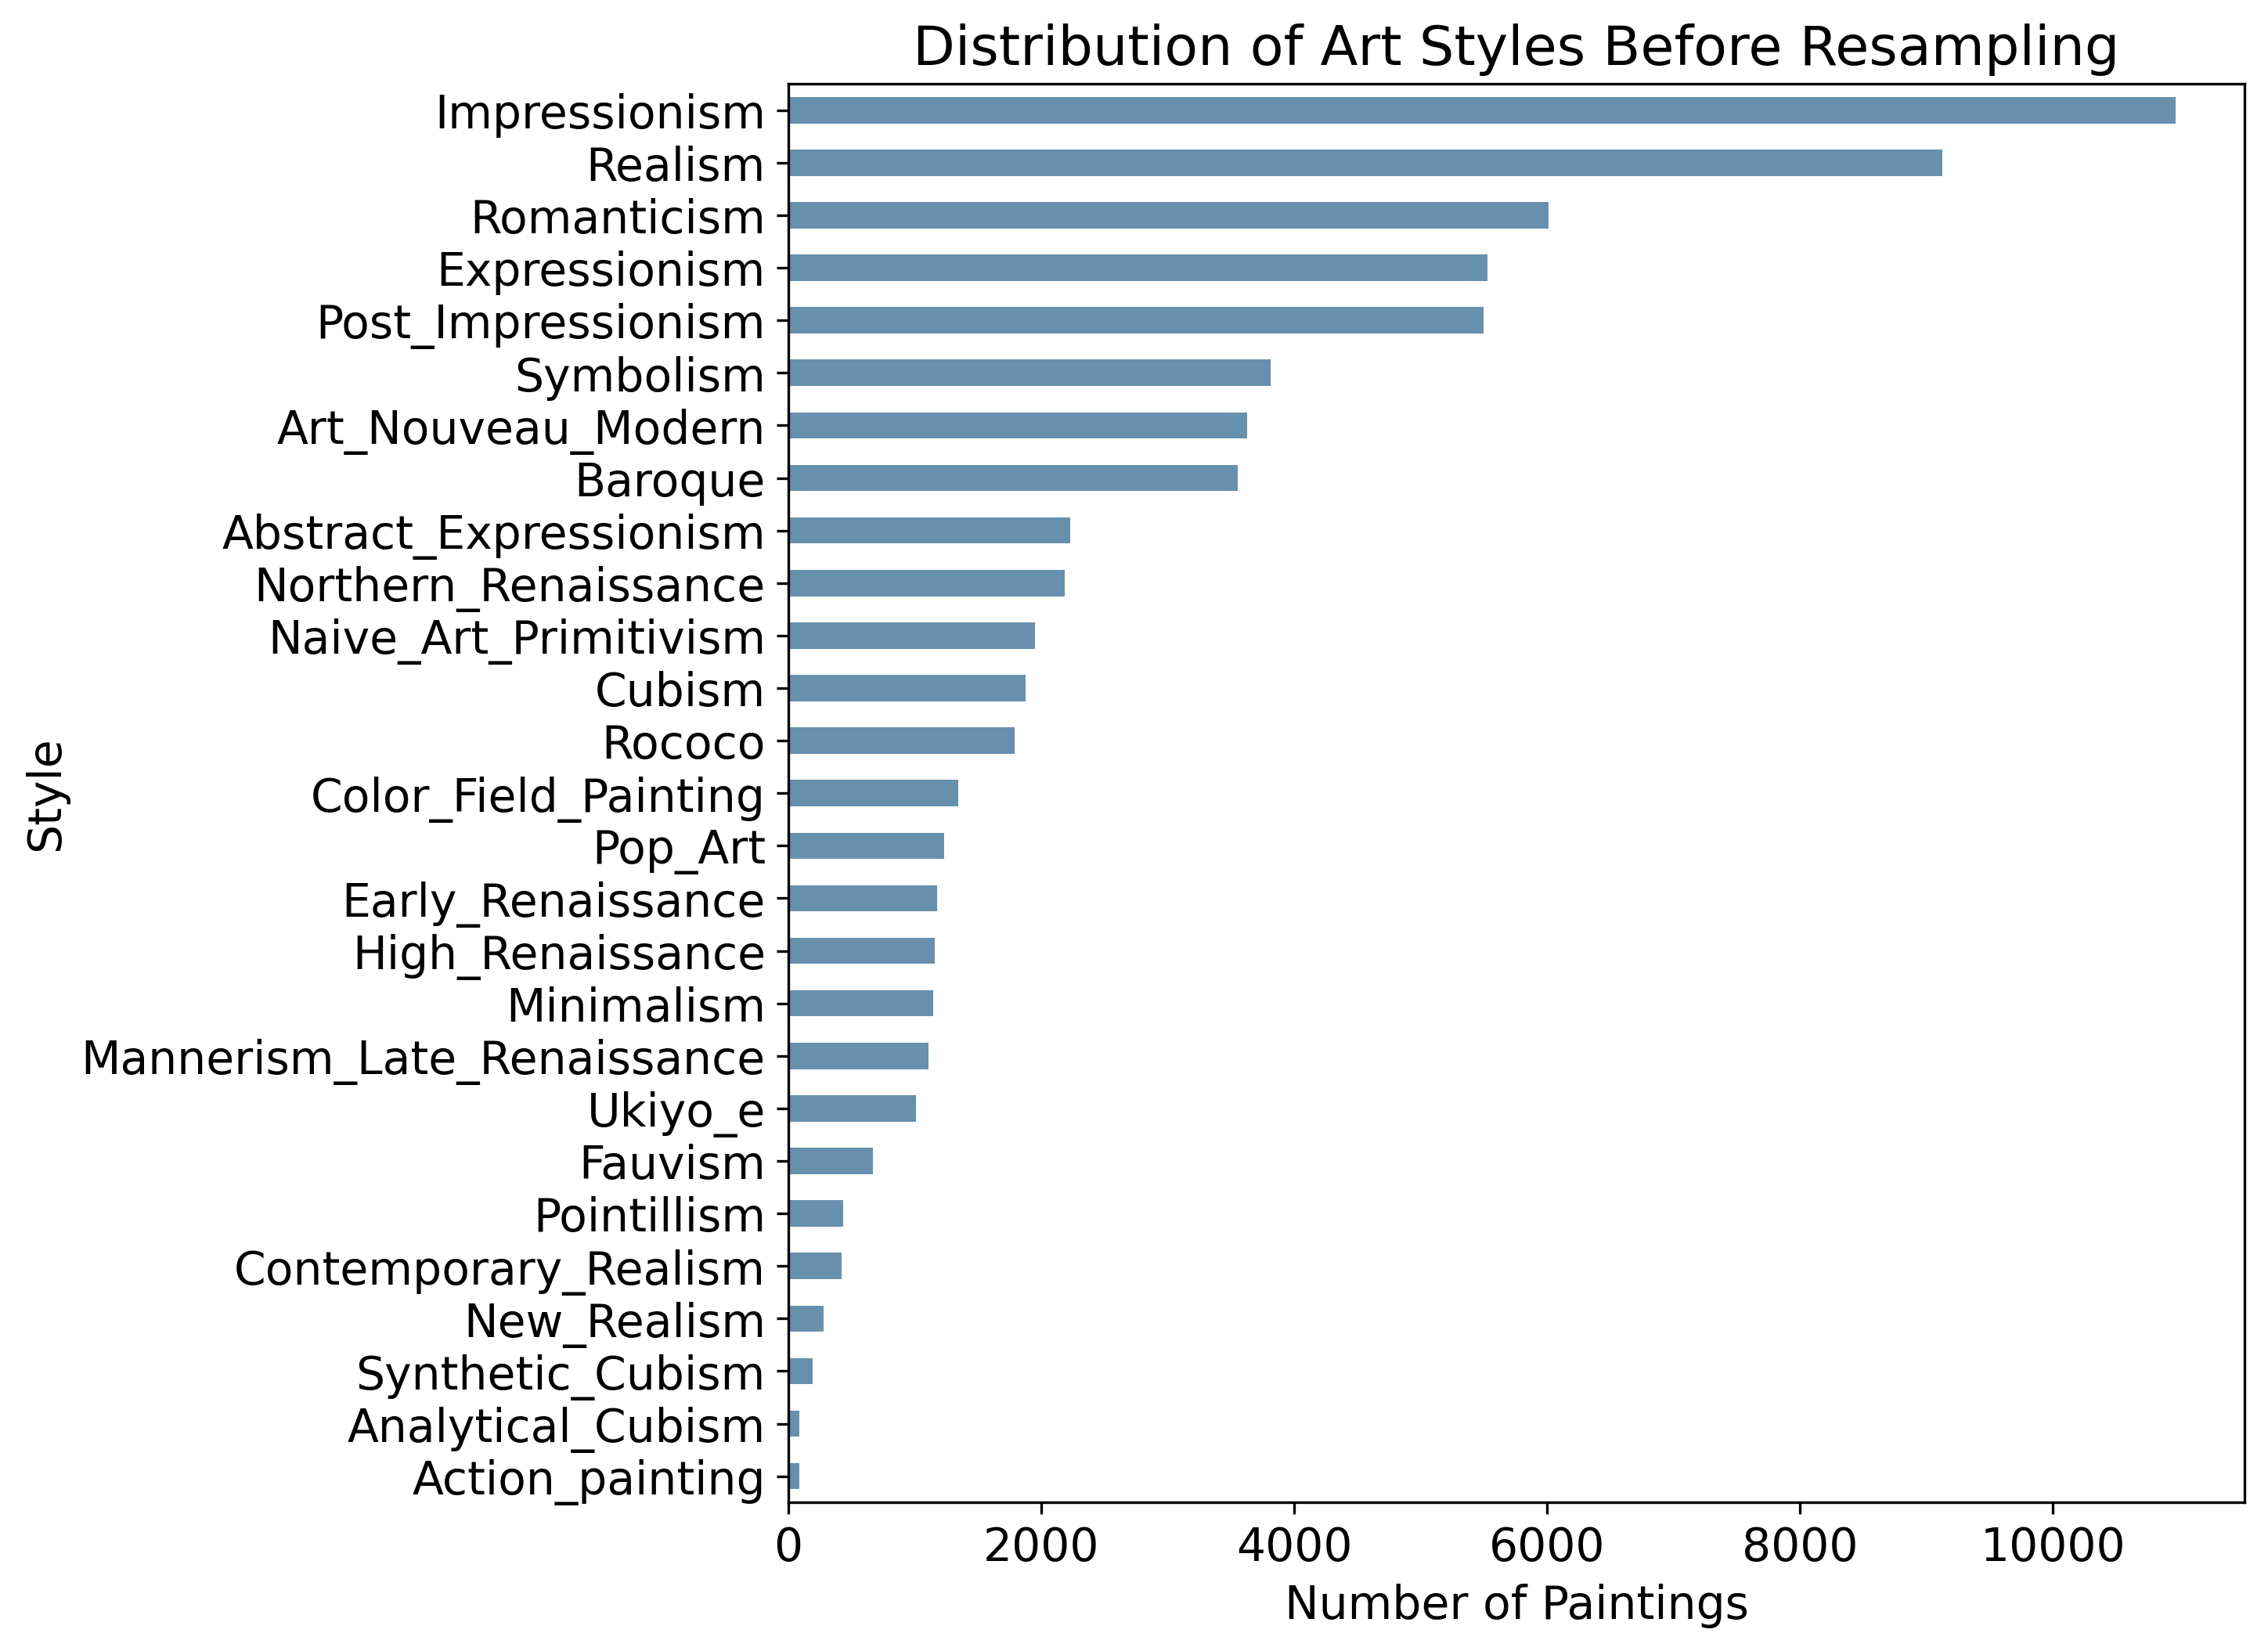

In [35]:
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Linux Libertine"]
plt.rcParams["figure.dpi"] = 300

# Look at the balance of the data for the sampled dataset
axes = train_df['style_name'].value_counts().sort_values().plot(kind = 'barh', 
                                                                  color = '#6790ac', 
                                                                  figsize=(8,8))
axes.set_title("Distribution of Art Styles Before Resampling")
axes.set_xlabel("Number of Paintings")
axes.set_ylabel("Style")
plt.savefig('data_visualizations/wikiart_stylename_metadata.jpg', dpi=300, bbox_inches='tight')  
plt.savefig('data_visualizations/wikiart_stylename_metadata.pdf', dpi=300, bbox_inches='tight')  

df_before = train_df['style_name'].value_counts().sort_values().rename_axis('style_name').reset_index(name='Before Resampling')

All styles ['Impressionism', 'Realism', 'Romanticism', 'Expressionism', 'Post_Impressionism', 'Symbolism', 'Art_Nouveau_Modern', 'Baroque', 'Abstract_Expressionism', 'Northern_Renaissance', 'Naive_Art_Primitivism', 'Cubism', 'Rococo', 'Color_Field_Painting', 'Pop_Art', 'Early_Renaissance', 'High_Renaissance', 'Minimalism', 'Mannerism_Late_Renaissance', 'Ukiyo_e', 'Fauvism', 'Pointillism', 'Contemporary_Realism', 'New_Realism', 'Synthetic_Cubism', 'Analytical_Cubism', 'Action_painting']


/var/folders/n2/bwdv1zhn55ngx2l75t_7jwkw0000gn/T/ipykernel_12268/3994349663.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  styles_df['resampled_file'] = styles_df['file']
/var/folders/n2/bwdv1zhn55ngx2l75t_7jwkw0000gn/T/ipykernel_12268/3994349663.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  styles_df['resampled_file'] = styles_df['file']
/var/folders/n2/bwdv1zhn55ngx2l75t_7jwkw0000gn/T/ipykernel_12268/3994349663.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

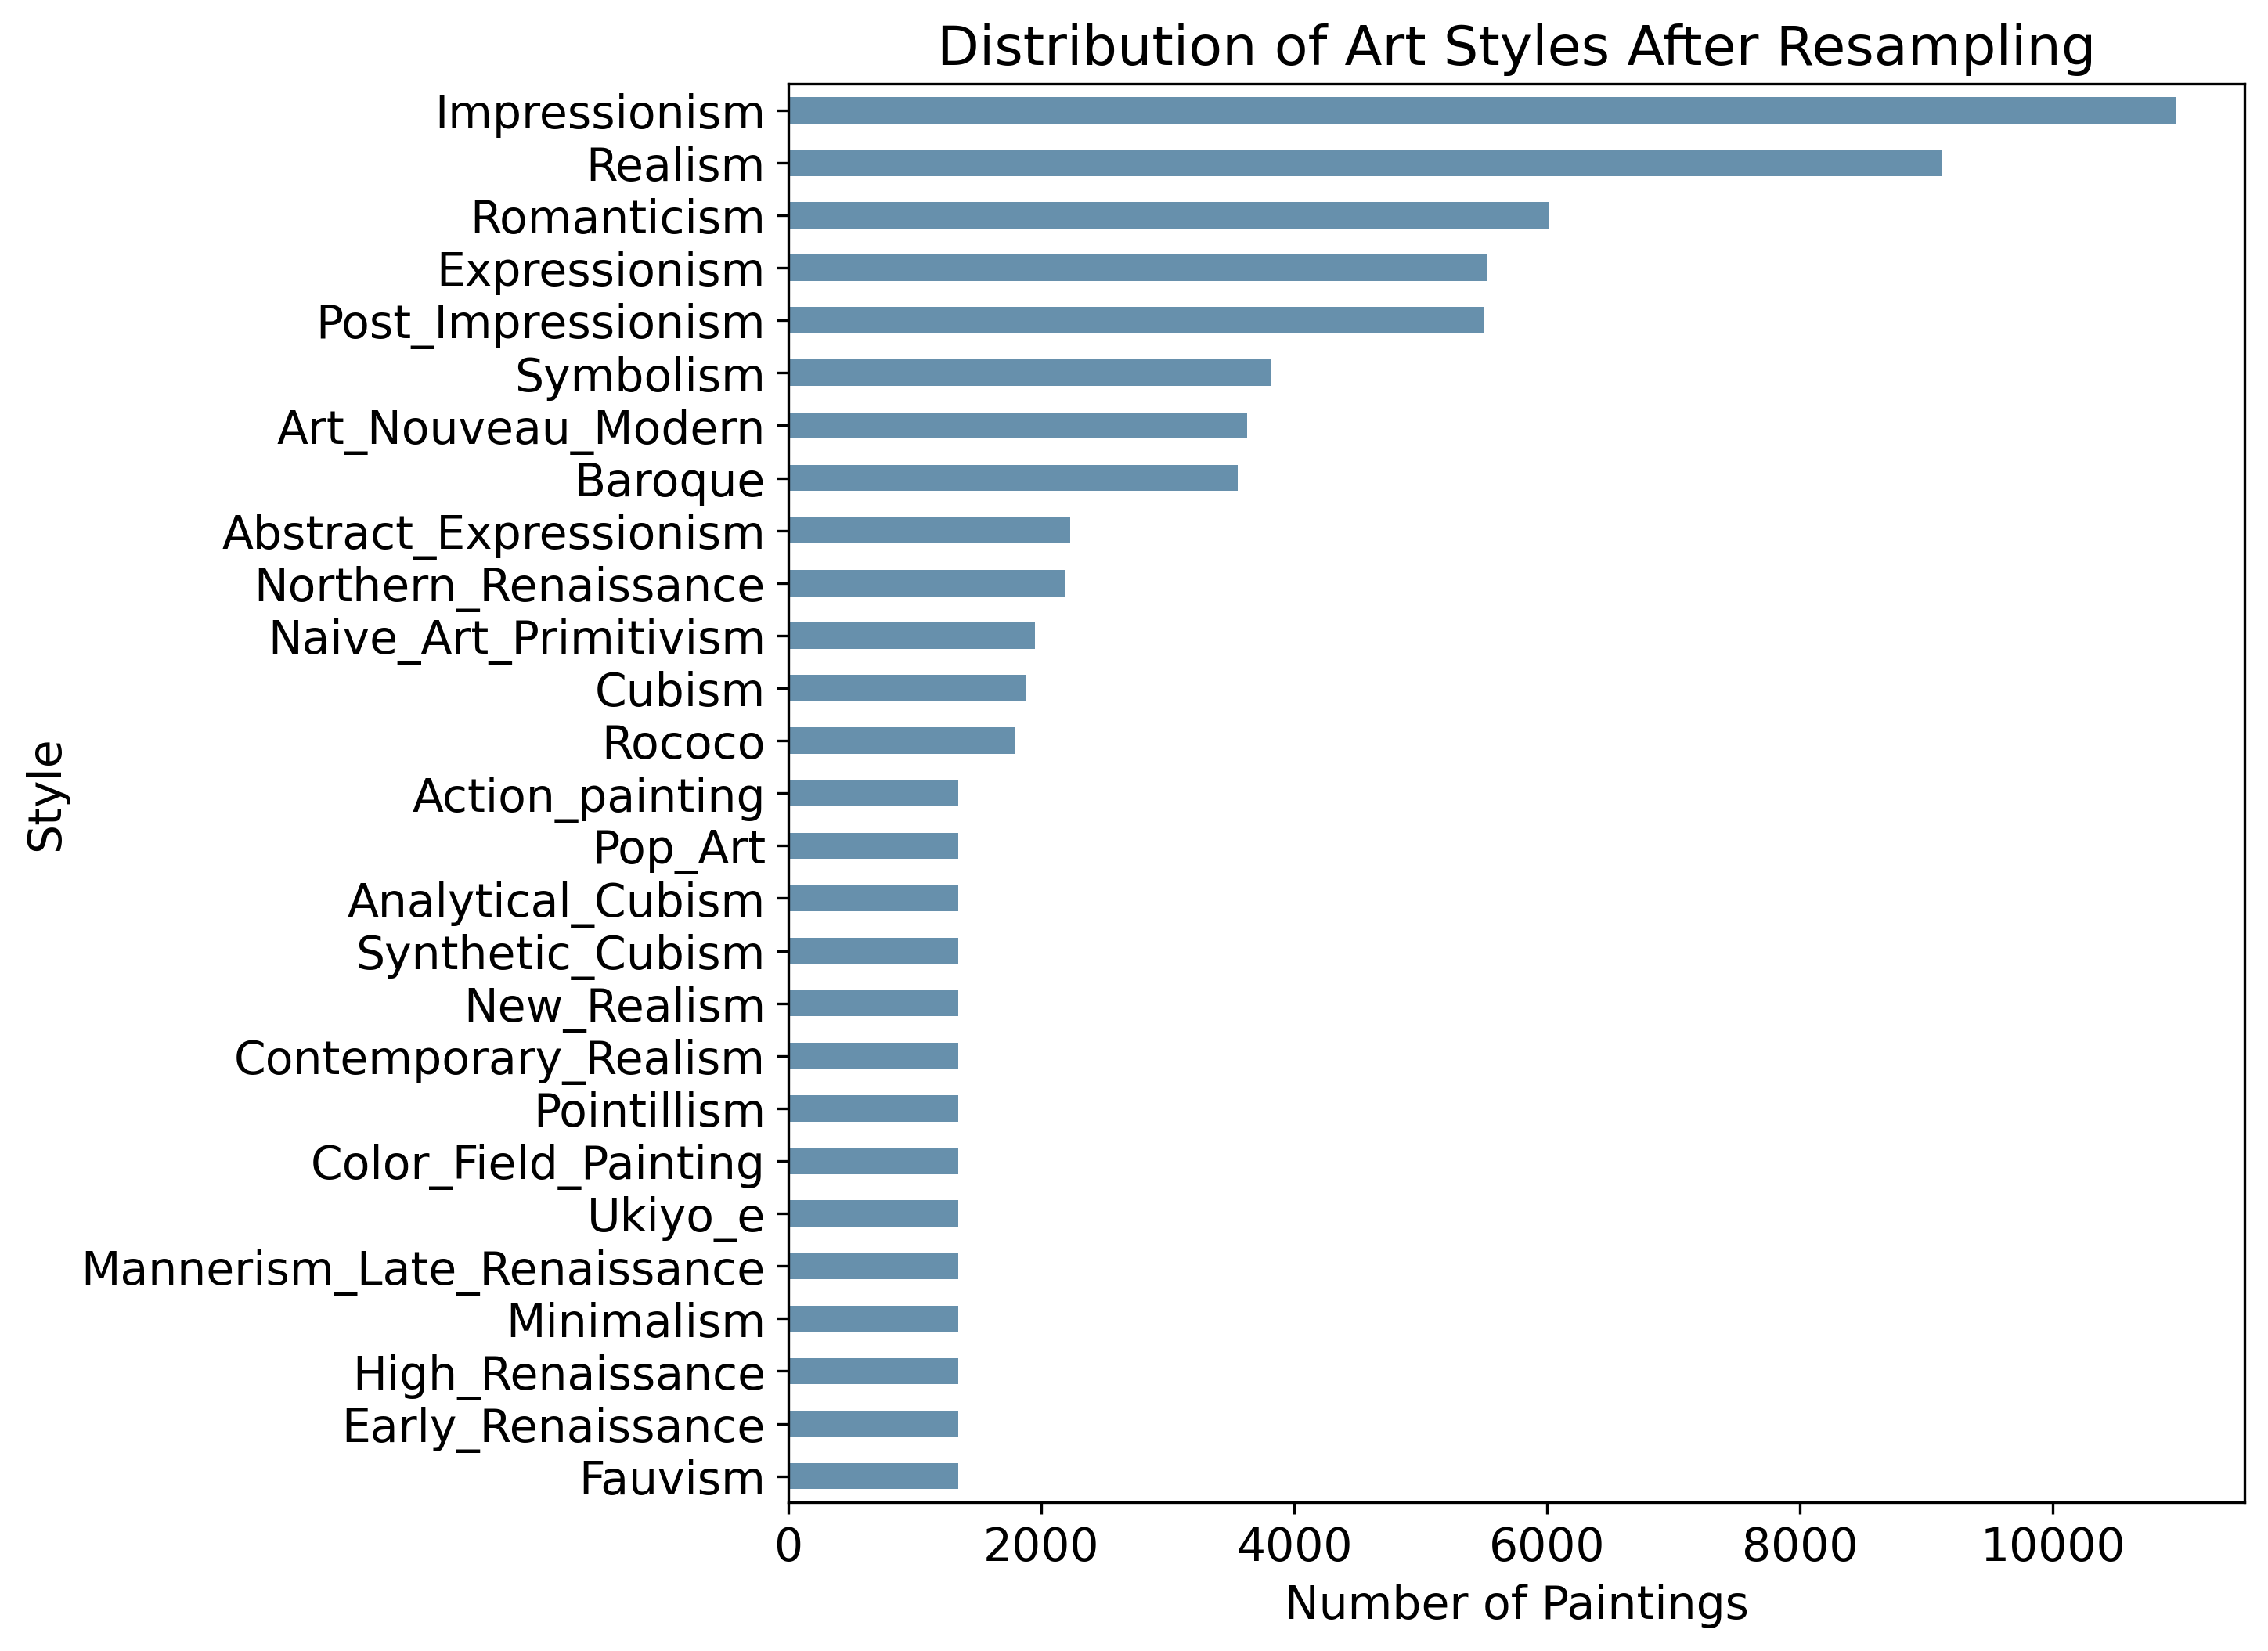

In [36]:
style_counts = train_df['style_name'].value_counts()
all_styles = style_counts.index.tolist()
print('All styles', all_styles)
sample_to = style_counts.quantile(0.5)

styles_to_resample = style_counts[style_counts < sample_to].index.tolist()

new_styles = []

for style in all_styles:
    if style in styles_to_resample:
        rows_to_resample = train_df[train_df['style_name'] == style]
        rows_to_resample['resampled_file'] = rows_to_resample['file']
        styles_df = resample(rows_to_resample, replace=True, n_samples=int(sample_to-len(rows_to_resample)))
        styles_df['resampled_file'] = [ round(random.random() * 100000000)  for k in styles_df.index]
        styles_df['resampled_file'] = 'random_' + styles_df['resampled_file'].astype(str) + '_' + styles_df['file'].astype(str)
        styles_df = pd.concat([styles_df, rows_to_resample], ignore_index=True)
    else:
        styles_df = train_df[train_df['style_name'] == style]
        styles_df['resampled_file'] = styles_df['file']

    new_styles.append(styles_df)

train_resampled_df = pd.concat(new_styles, ignore_index=True)

plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Linux Libertine"]
plt.rcParams["figure.dpi"] = 300

axes = train_resampled_df['style_name'].value_counts().sort_values().plot(kind = 'barh', 
                                                                          color = '#6790ac', 
                                                                          figsize=(8,8))
axes.set_title("Distribution of Art Styles After Resampling")
axes.set_xlabel("Number of Paintings")
axes.set_ylabel("Style")

df_after = train_resampled_df['style_name'].value_counts().sort_values().rename_axis('style_name').reset_index(name='After Resampling')
plt.savefig('data_visualizations/wikiart_stylename_resampled.jpg', dpi=300, bbox_inches='tight')  
plt.savefig('data_visualizations/wikiart_stylename_resampled.pdf', dpi=300, bbox_inches='tight')  

train_resampled_df.to_csv('./data/wikiart_train.csv', index=False)
test_df.to_csv('./data/wikiart_test.csv', index=False)

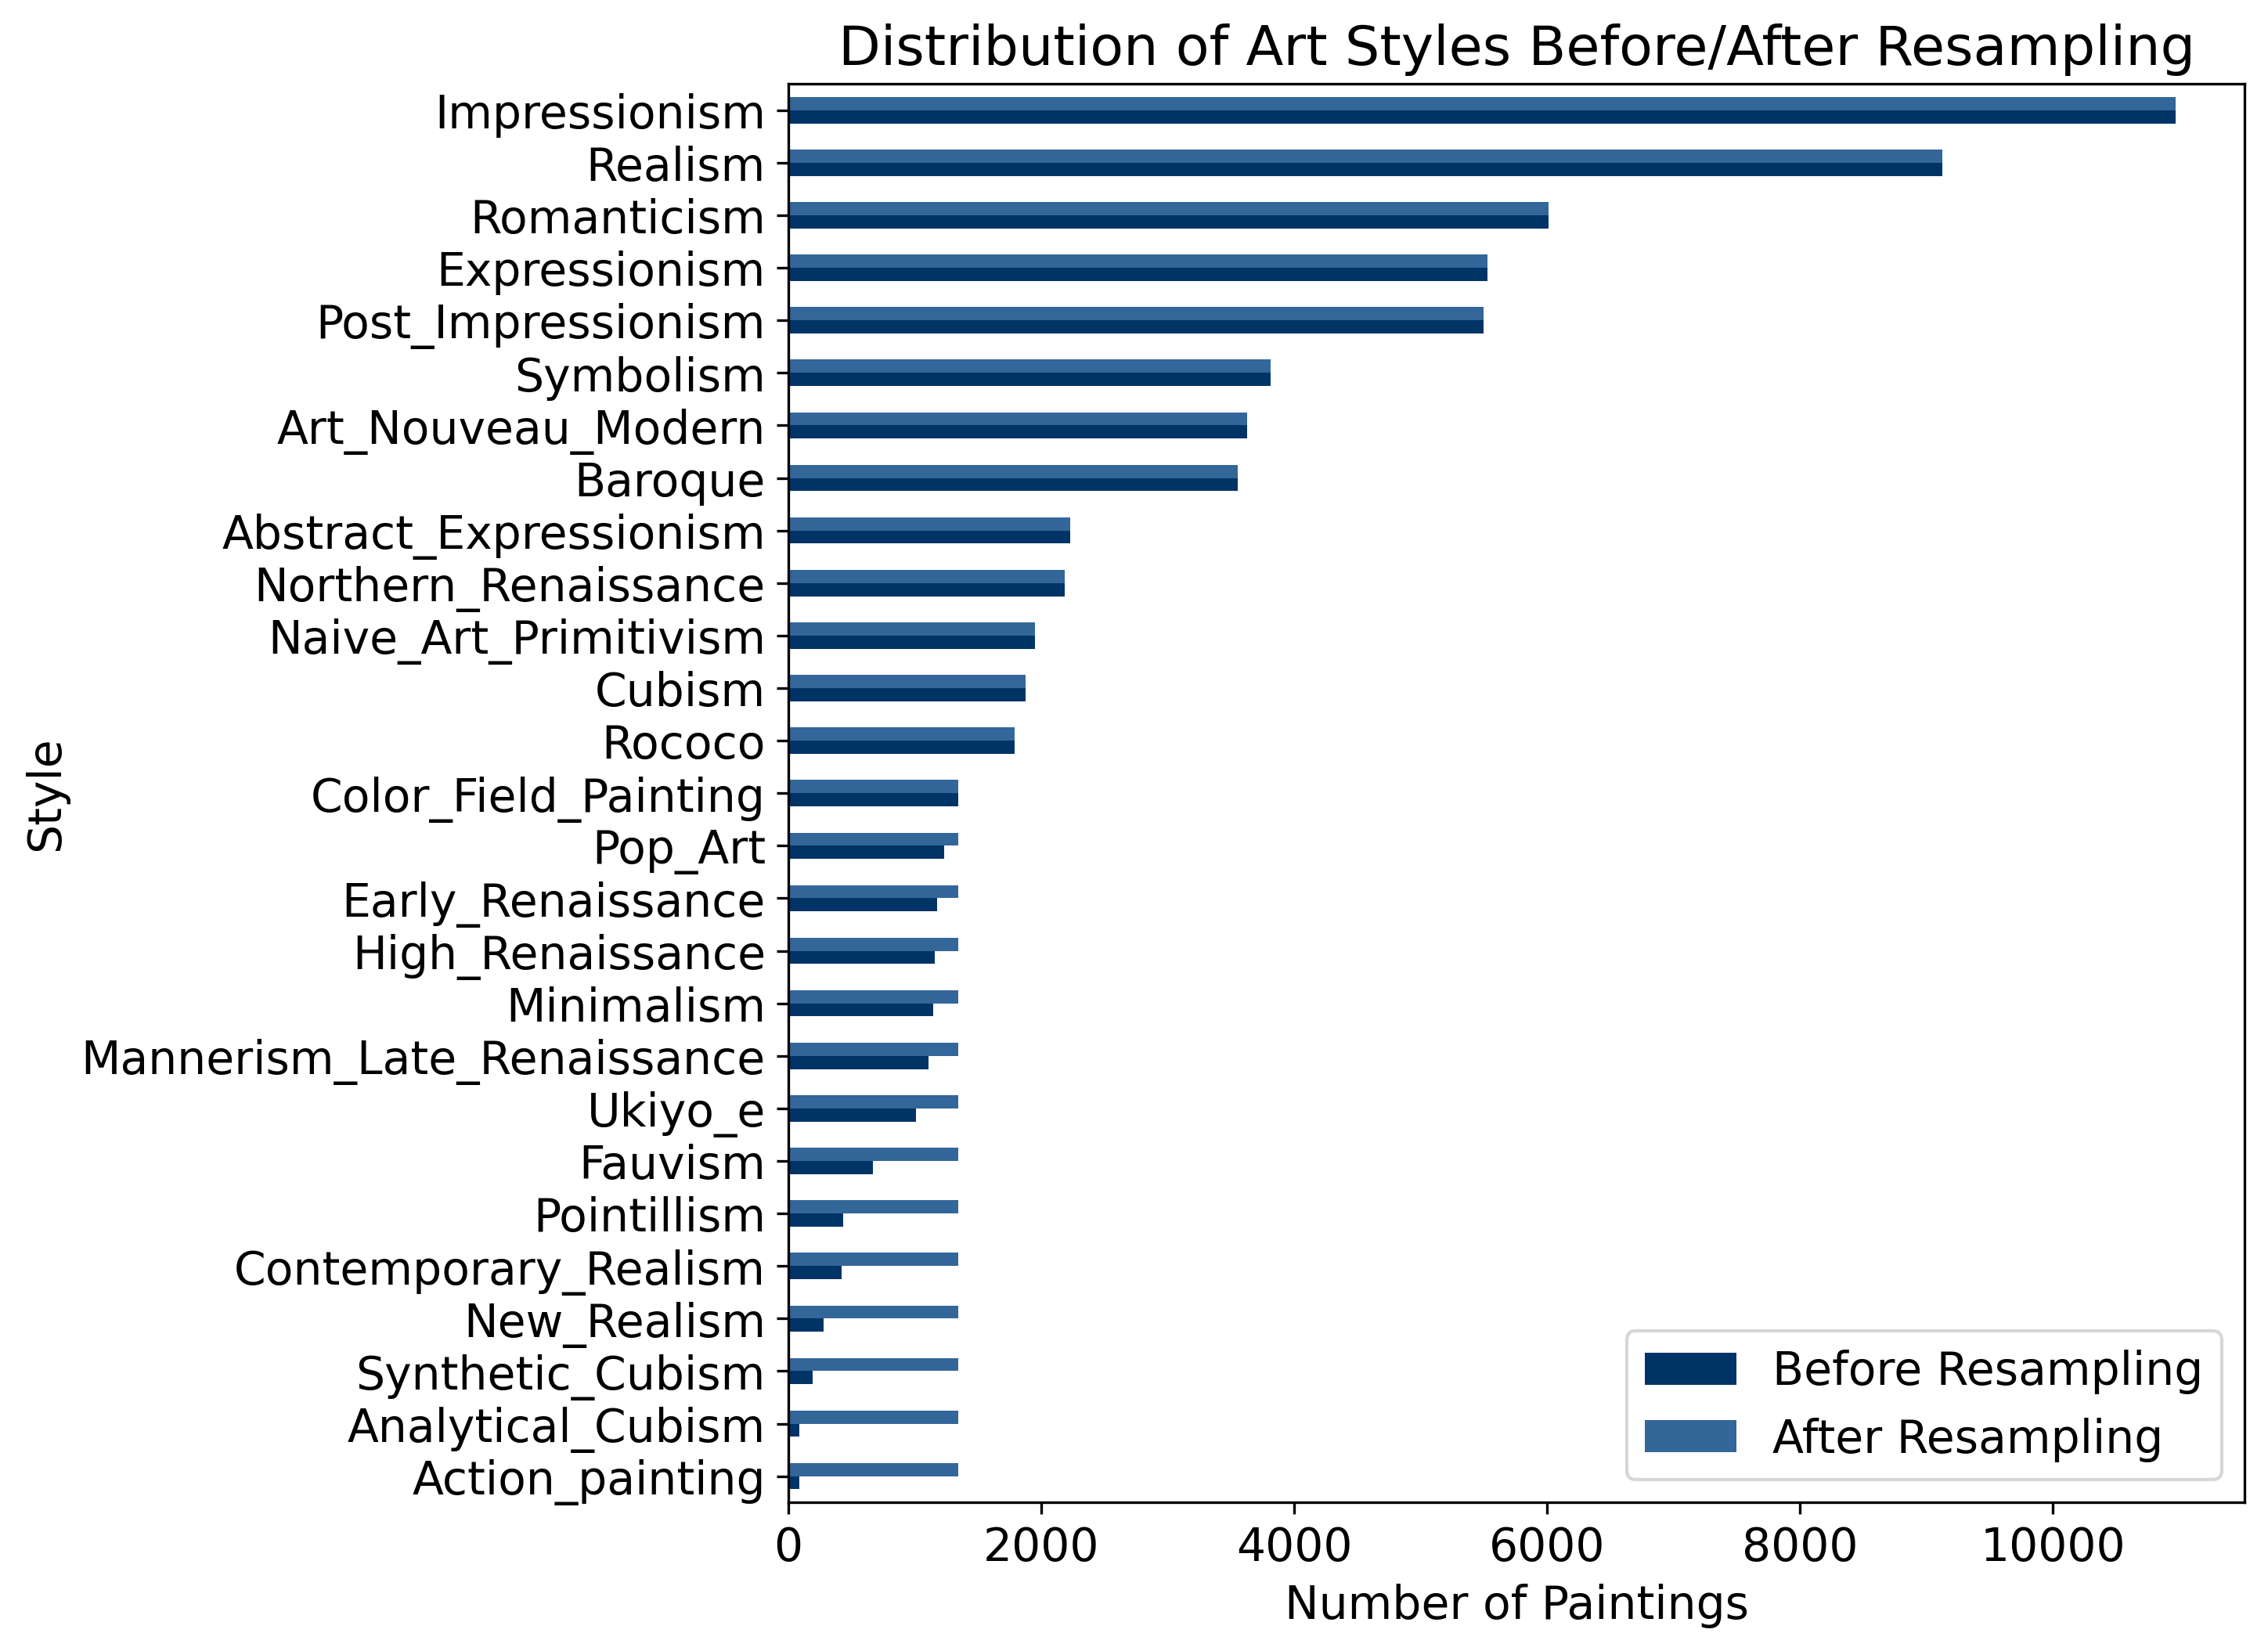

In [45]:
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 14
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Linux Libertine"]
plt.rcParams["figure.dpi"] = 300

axes = pd.merge(df_before, df_after, on=['style_name']).set_index('style_name').sort_values(by="Before Resampling").plot(kind = 'barh', color={"Before Resampling": "#003366", "After Resampling": "#336699"}, figsize=(8,8))
axes.set_title("Distribution of Art Styles Before/After Resampling")
axes.set_xlabel("Number of Paintings")
axes.set_ylabel("Style")
plt.savefig('data_visualizations/wikiart_resampled_comparison.jpg', dpi=300, bbox_inches='tight')  
plt.savefig('data_visualizations/wikiart_resampled_comparison.png', dpi=300, bbox_inches='tight')  
plt.savefig('data_visualizations/wikiart_resampled_comparison.pdf', dpi=300, bbox_inches='tight')  

In [33]:
len(train_df['style_name'])

69634

In [34]:
print(train_resampled_df)

                                                    file  artist  genre  \
0                claude-monet_haystacks-overcast-day.jpg       4    133   
1      pierre-auguste-renoir_landscape-near-essoyes-1...      17    133   
2            valentin-serov_peter-i-on-the-hunt-1902.jpg      57    131   
3                       claude-monet_head-of-the-dog.jpg       4    139   
4                 raoul-dufy_claudine-from-back-1906.jpg     115    134   
...                                                  ...     ...    ...   
78521              jackson-pollock_yellow-islands(1).jpg       0    129   
78522                  jackson-pollock_number-8-1949.jpg       0    129   
78523                        franz-kline_herald-1954.jpg       0    129   
78524                    jackson-pollock_number-3(3).jpg       0    129   
78525                   jackson-pollock_number-23(1).jpg       0    129   

       style       style_name  \
0        152    Impressionism   
1        152    Impressionism   


In [35]:
import shutil

train_image_location = 'wikiart_train/'
test_image_location = 'wikiart_test/'

print('Removing any existing train and test image directories')
shutil.rmtree(train_image_location, ignore_errors=True)
shutil.rmtree(test_image_location, ignore_errors=True)

print('Recreating train and test image locations')

for _,row in train_resampled_df.iterrows():
  os.makedirs(train_image_location + f'{row["style_name"]}/', exist_ok=True)
  shutil.copy("wikiart/" + f'{row["style_name"]}/' + row['file'], train_image_location + f'{row["style_name"]}/' + row['resampled_file'])

for _,row in test_df.iterrows():
  os.makedirs(test_image_location + f'{row["style_name"]}/', exist_ok=True)
  shutil.copy("wikiart/" + f'{row["style_name"]}/' + row['file'], test_image_location + f'{row["style_name"]}/'  + row['file'])

Removing any existing train and test image directories
Recreating train and test image locations


In [36]:
# Delete the wikiart dataset
import shutil

shutil.rmtree('wikiart/', ignore_errors=True)

In [37]:
# from glob import glob
# import cv2
# import numpy as np

# # Sample for mean/std
# wikiart_images = [y for x in os.walk('wikiart_train/') for y in glob(os.path.join(x[0], '*.jpg'))]

# r, g, b = [], [], []

# try:
#     for img_path in wikiart_images:
#         img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (256, 256))
#         r.extend(np.array(img[:,:,0]).flatten().tolist())
#         g.extend(np.array(img[:,:,1]).flatten().tolist())
#         b.extend(np.array(img[:,:,2]).flatten().tolist())
# except Exception as e:
#     print(str(e))

# mean = [np.mean(r) / 255, np.mean(g) / 255, np.mean(b) / 255]
# std = [np.std(r) / 255, np.std(g) / 255, np.std(b) / 255]

# print('Mean', mean)
# print('std', std)

# print('Writing to file')
# np.asarray(mean).tofile('./data/wikiart_mean.csv', sep=',')
# np.asarray(std).tofile('./data/wikiart_std.csv', sep=',')

In [38]:
import pandas as pd

mean = pd.read_csv('./data/wikiart_mean.csv', header=None).to_numpy()[0]
std = pd.read_csv('./data/wikiart_std.csv', header=None).to_numpy()[0]

print('Mean', mean)
print('std', std)

Mean [0.41820036 0.48691021 0.53252243]
std [0.26655692 0.26703016 0.27482295]


In [39]:
from torchvision.transforms.transforms import CenterCrop
import torchvision
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

class Transforms:
    def __init__(self, transforms: A.Compose):
        self.transforms = transforms

    def __call__(self, img, *args, **kwargs):
        return self.transforms(image=np.array(img))["image"]

transform = A.Compose(
    [
        A.PadIfNeeded(min_height=256, min_width=256),
        A.SmallestMaxSize(max_size=256),
        A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.7),
        A.Flip(p=0.8),
        A.RandomCrop(height=224, width=224),
        A.Normalize(mean=mean, std=std),
        ToTensorV2(),
    ]
)

train = torchvision.datasets.ImageFolder(
    root = 'wikiart_train/',
    transform = Transforms(transform)
)

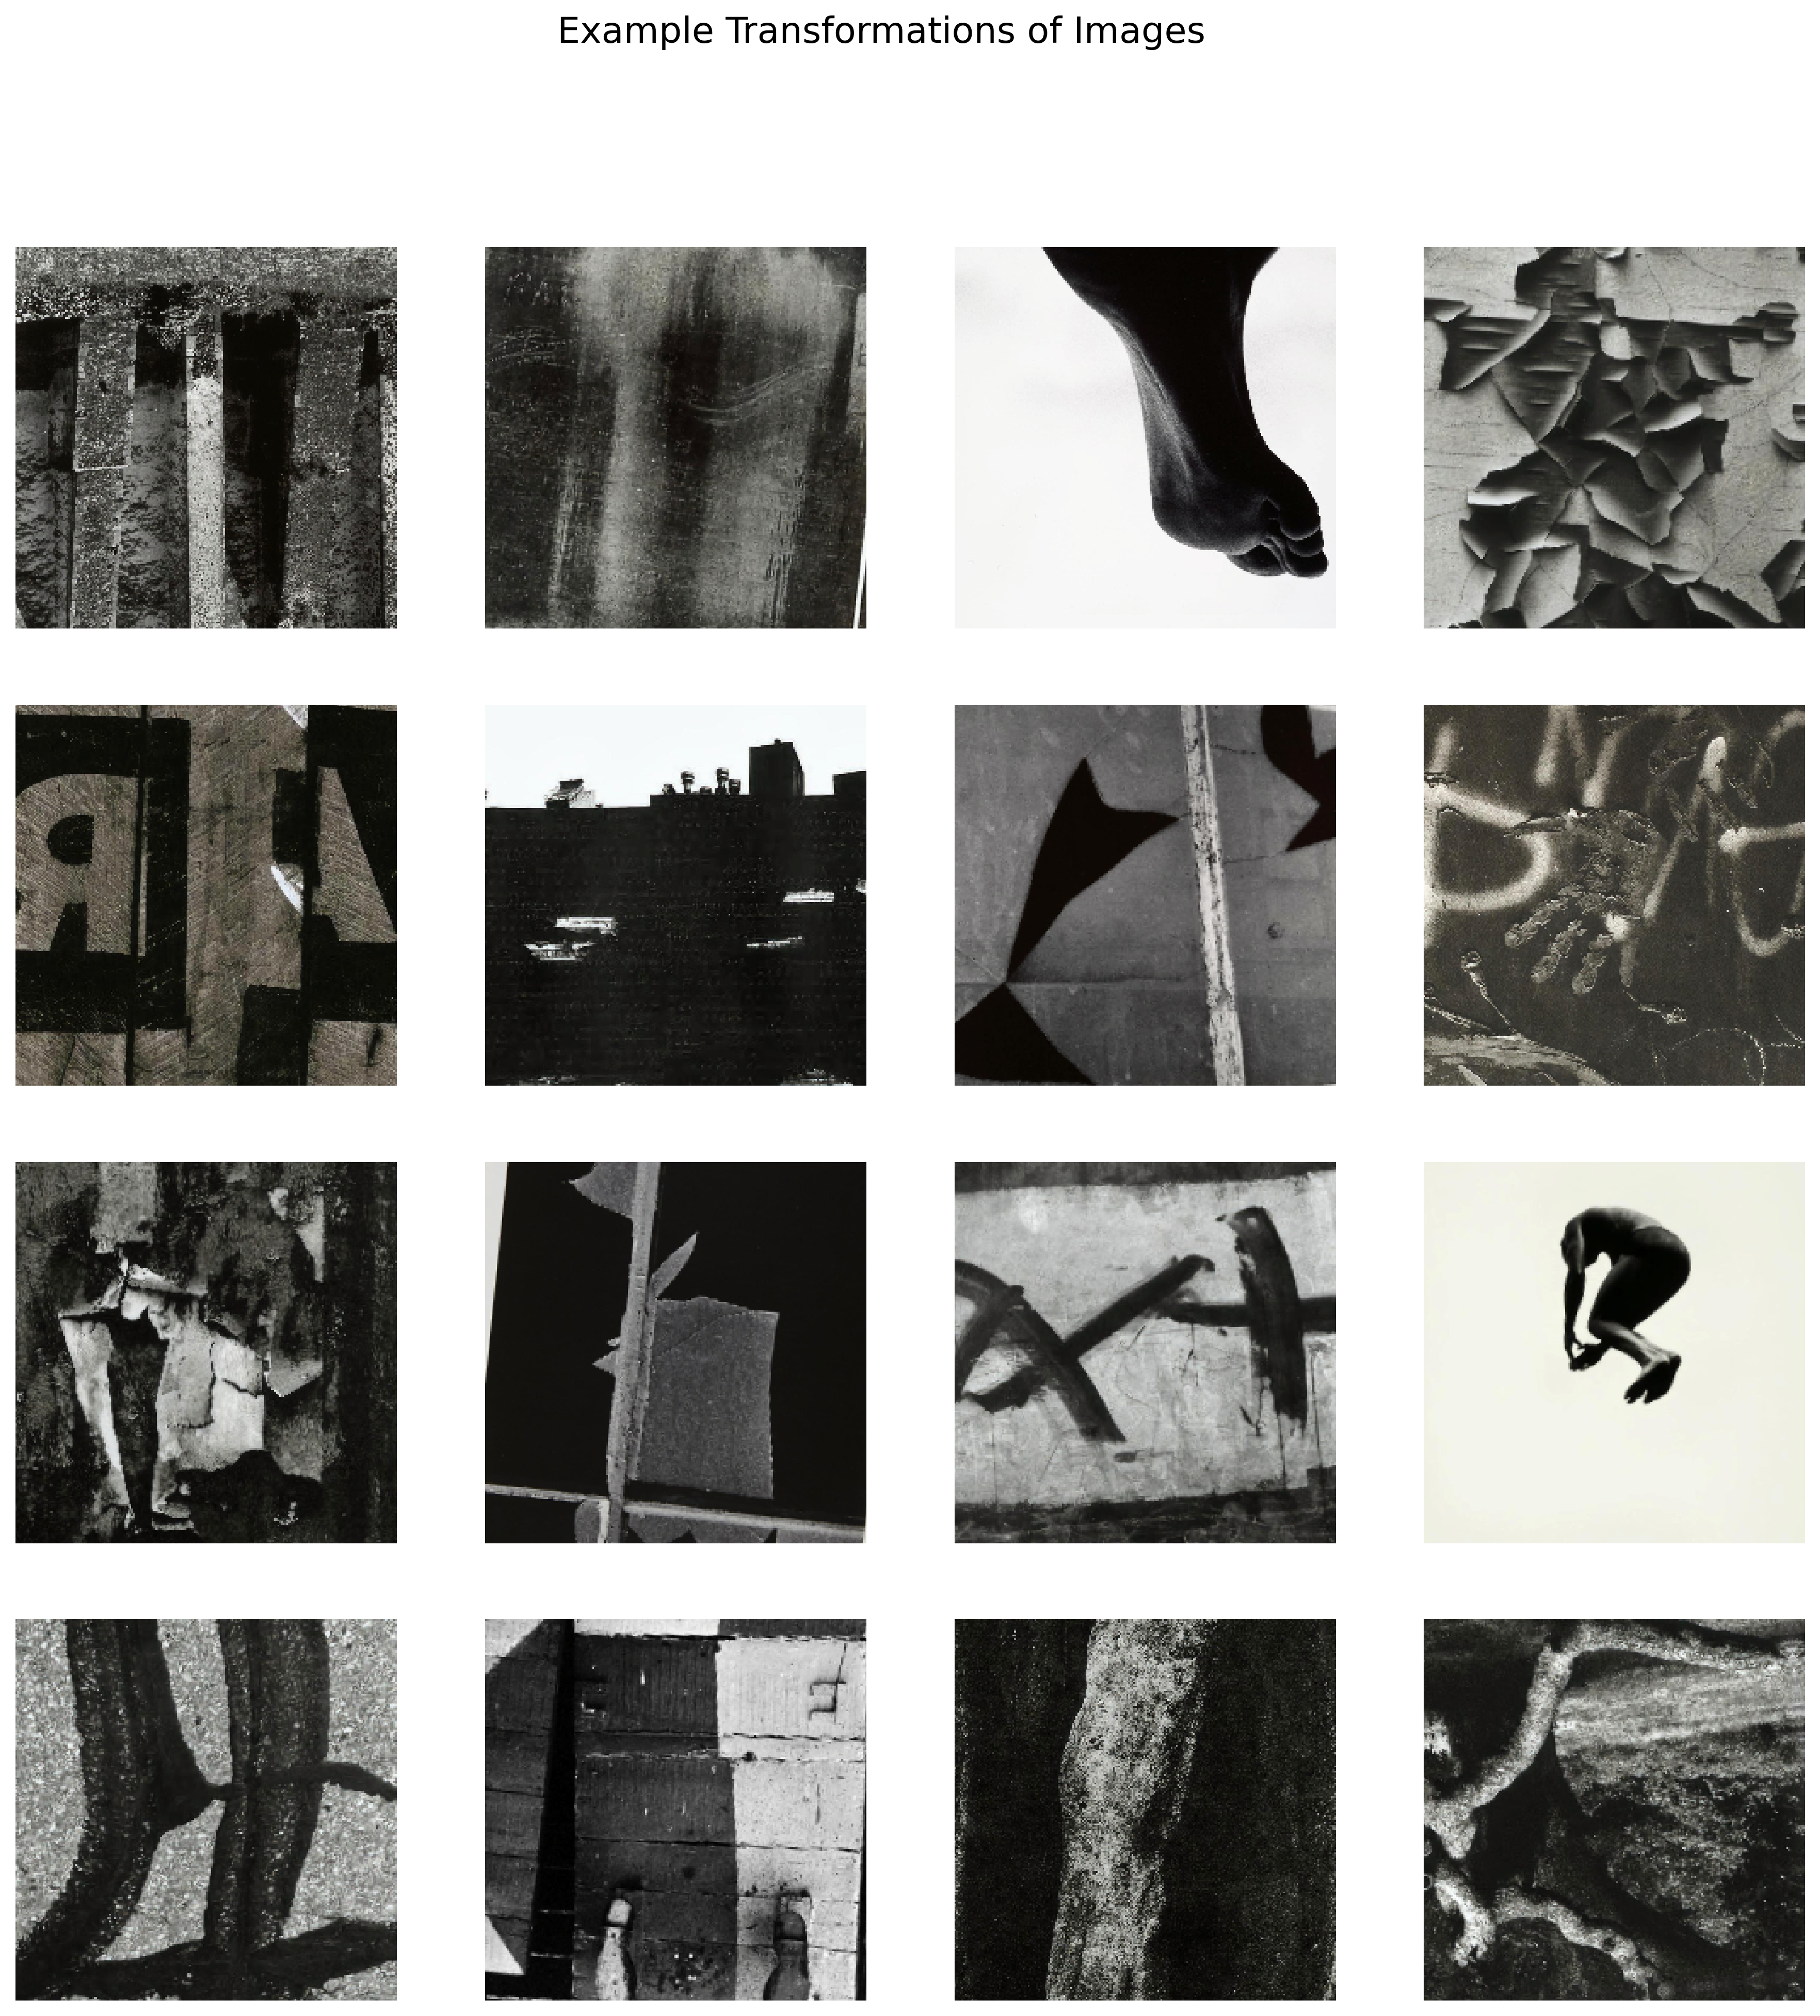

In [40]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(4,4,figsize= (15,15))

for i in range(16):

  img = train[i][0].numpy().transpose(1, 2, 0)
  img = np.clip((std * img) + mean, 0, 1)
  axes.flat[i].imshow(img)
  axes.flat[i].axis('off')

fig.suptitle('Example Transformations of Images')

# Follow aspect ratio of either 1:1 or 1.68:1 (8.5, 4.75/5)
fig.savefig('data_visualizations/train_wikiart_image_transformations.jpg', dpi=300, bbox_inches='tight')  
fig.savefig('data_visualizations/train_wikiart_image_transformations.pdf', dpi=300, bbox_inches='tight')  
plt.show()